# Automate 

## Immo 75
Real estate data in Paris

In [1]:
def dvf(code_commune):  
    # demande de valeur financiere
    # dvf(75114)
    import urllib.request
    import json    

    try:
        url = "https://26yrburrn0.execute-api.eu-west-3.amazonaws.com/dev/dvf?code_commune="+str(code_commune)   
        response = urllib.request.urlopen(url)
        html = response.read()
        json_data = json.loads(html)
        
    except urllib.error.URLError:
        # if the API doesnt work, read the file
        print('Problem with the API')
          
    return json_data

In [2]:
json_data = dvf(75114)

In [3]:
import pandas as pd
df = pd.DataFrame.from_dict(json_data)
df

,adresse_code_voie,adresse_nom_voie,adresse_numero,adresse_suffixe,ancien_code_commune,ancien_id_parcelle,ancien_nom_commune,code_commune,code_departement,code_nature_culture,...,nature_mutation,nom_commune,nombre_lots,nombre_pieces_principales,numero_disposition,numero_volume,surface_reelle_bati,surface_terrain,type_local,valeur_fonciere
9969,1158,RUE BOULARD,45.0,NaN,NaN,NaN,NaN,75114,75,NaN,...,Vente,Paris 14e Arrondissement,1,3.0,1,NaN,31.0,NaN,Appartement,95000.0
9970,6875,RUE D ODESSA,9.0,NaN,NaN,NaN,NaN,75114,75,NaN,...,Vente,Paris 14e Arrondissement,1,3.0,1,NaN,43.0,NaN,Appartement,545000.0
9971,8446,RUE DE LA SABLIERE,26.0,NaN,NaN,NaN,NaN,75114,75,NaN,...,Vente,Paris 14e Arrondissement,2,1.0,1,NaN,18.0,NaN,Appartement,220000.0
9972,8105,AV REILLE,33.0,B,NaN,NaN,NaN,75114,75,NaN,...,Vente,Paris 14e Arrondissement,1,1.0,1,NaN,25.0,NaN,Appartement,132500.0
9973,5000,RUE JONQUOY,41.0,NaN,NaN,NaN,NaN,75114,75,NaN,...,Vente,Paris 14e Arrondissement,2,4.0,1,NaN,75.0,NaN,Appartement,590000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10872,3967,RUE GASSENDI,17.0,NaN,NaN,NaN,NaN,75114,75,NaN,...,Vente,Paris 14e Arrondissement,2,2.0,1,NaN,21.0,NaN,Appartement,335500.0
10873,3967,RUE GASSENDI,17.0,NaN,NaN,NaN,NaN,75114,75,NaN,...,Vente,Paris 14e Arrondissement,1,1.0,1,NaN,10.0,NaN,Appartement,335500.0
10874,2639,RUE DECRES,7.0,NaN,NaN,NaN,NaN,75114,75,NaN,...,Vente,Paris 14e Arrondissement,1,0.0,1,NaN,25.0,NaN,Local industriel. commercial ou assimilé,238925.0
10875,2639,RUE DECRES,7.0,NaN,NaN,NaN,NaN,75114,75,NaN,...,Vente,Paris 14e Arrondissement,1,0.0,1,NaN,12.0,NaN,Local industriel. commercial ou assimilé,238925.0


<AxesSubplot:>

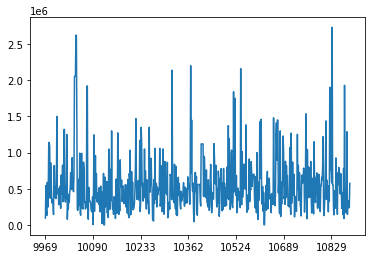

In [52]:
df2 = df[(df.valeur_fonciere < 3000000) & (df.surface_reelle_bati < 400)]
df2.valeur_fonciere.plot()

In [53]:
df2.to_excel('dvf14.xlsx')

##  Excel automation

In [54]:
import openpyxl as xl
from openpyxl.chart import LineChart, Reference,ScatterChart,Series

Adding programmatically a second sheet selecting only the surface and price

In [55]:
workbook = xl.load_workbook('dvf14.xlsx')
sheet_1 = workbook['Sheet1']
workbook.create_sheet('Sheet2')
sheet_2 = workbook['Sheet2']

In [56]:
sheet_1['AL'][0].value

'surface_reelle_bati'

In [57]:
sheet_1['AO'][0].value

'valeur_fonciere'

In [59]:
# len(sheet_1['AL'])
sheet_1.max_row

641

In [60]:
from openpyxl.utils.cell import coordinate_from_string, column_index_from_string
xy = coordinate_from_string('AL1') # returns ('AL',1)
row = xy[1]
col = column_index_from_string(xy[0]) # returns 38
row,col

(1, 38)

## Copy data from one sheet to another

https://www.geeksforgeeks.org/python-how-to-copy-data-from-one-excel-sheet-to-another/

In [61]:
AL = 38
mr = sheet_1.max_row
for i in range (1, mr + 1):
    # reading cell value from source excel file
    c = sheet_1.cell(row = i, column = AL)

    # writing the read value to destination excel file
    sheet_2.cell(row = i, column = 1).value = c.value

In [62]:
AO = 41
mr = sheet_1.max_row
for i in range (1, mr + 1):
    # reading cell value from source excel file
    c = sheet_1.cell(row = i, column = AO)

    # writing the read value to destination excel file
    sheet_2.cell(row = i, column = 2).value = c.value

In [63]:
workbook.save("dvf14_chart.xlsx")

Other approach

In [64]:
sheet_1['AL'][1].value
# sheet_2['B'] = sheet_1['A0']

31

In [65]:
sheet_2.cell(column=1, row=2,value=sheet_1['AL'][1].value).value

31

## Create Excel Charts

Create Chartsheet: https://openpyxl.readthedocs.io/en/stable/charts/chartsheet.html

- https://www.geeksforgeeks.org/python-plotting-charts-in-excel-sheet-using-openpyxl-module-set-3/

- https://stackoverflow.com/questions/63696835/python-openpyxl-scatter-plots-with-secondary-y-axis

### Scatter Chart

![immo_chart](dvf14_chart.png)

In [68]:
xvalues = Reference(sheet_2, min_col = 1, min_row = 2, max_row = sheet_1.max_row)
xvalues

'Sheet2'!$A$2:$A$641

In [69]:
chart = ScatterChart()
chart.title = "Scatter Chart"
chart.style = 13
chart.y_axis.title = 'Price'
chart.x_axis.title = 'Surface'

values = Reference(sheet_2, min_col=2, min_row=1, max_row=mr)
series = Series(values, xvalues,title_from_data=True)
series.marker.symbol = "diamond"
series.marker.graphicalProperties.solidFill = "0000FF" # Marker filling
series.marker.graphicalProperties.line.solidFill = "0000FF" # Marker outline
series.graphicalProperties.line.noFill = True  # hide lines
chart.series.append(series)

sheet_2.add_chart(chart, "D2")

In [47]:
s = chart.series[0]
s.graphicalProperties.line.noFill

False

In [70]:
workbook.save("dvf14_chart.xlsx")

### Line Chart

In [27]:
c2 = LineChart()
c2.y_axis.title = 'Price'
c2.x_axis.title = 'Surface'
c2.add_data(values)
c2.set_categories(xvalues)
sheet_2.add_chart(c2, 'D2') 
workbook.save('dvf14_chart2.xlsx')

X values need to be sorted in ascending order to plot Line Chart

Scatter plot helper code:

In [67]:
from openpyxl import Workbook
from openpyxl.chart import (
    ScatterChart,
    Reference,
    Series,
)

wb = Workbook()
ws = wb.active

rows = [
    ['Size', 'Batch 1', 'Batch 2'],
    [2, 40, 30],
    [3, 40, 25],
    [4, 50, 30],
    [5, 30, 25],
    [6, 25, 35],
    [7, 20, 40],
]

for row in rows:
    ws.append(row)

chart = ScatterChart()
chart.title = "Scatter Chart"
chart.style = 13
chart.x_axis.title = 'Size'
chart.y_axis.title = 'Percentage'

xvalues = Reference(ws, min_col=1, min_row=2, max_row=7)
for i in range(2, 4):
    values = Reference(ws, min_col=i, min_row=1, max_row=7)
    series = Series(values, xvalues, title_from_data=True)
    chart.series.append(series)

ws.add_chart(chart, "A10")

wb.save("scatter.xlsx")

![scatter](scatter.png)

## Extracting chart

In [73]:
import os
os.getcwd()

'd:\\devel\\automate'

In [74]:
input_file = "d:\\devel\\automate\\dvf14_chart.xlsx"
output_image = "immo_chart.png"

In [75]:
import win32com.client
operation = win32com.client.Dispatch("Excel.Application")
operation.Visible = 0
operation.DisplayAlerts = 0
workbook_bis = operation.Workbooks.Open(input_file)
sheet_bis = operation.Sheets(2)

In [76]:
from PIL import ImageGrab, Image
for x, chart in enumerate(sheet_bis.Shapes):
    chart.Copy()
    image = ImageGrab.grabclipboard()
    image.save(output_image, 'png')
    pass
workbook_bis.Close(True)
operation.Quit()

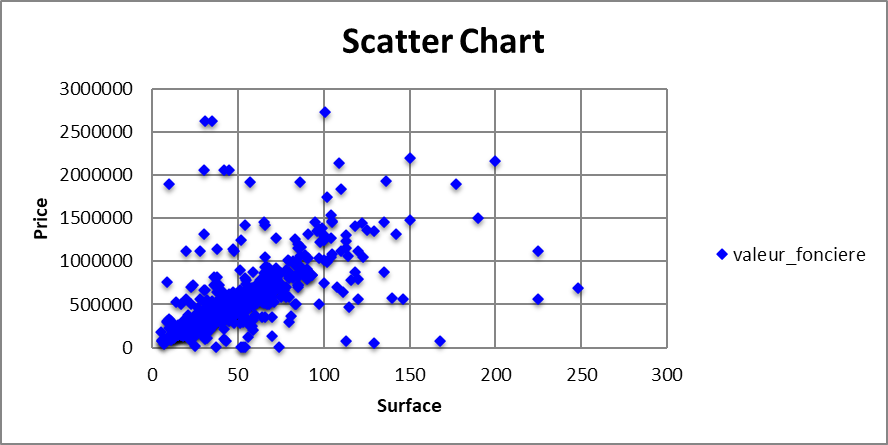

In [77]:
from IPython.display import Image
Image(output_image)

## Next: Create Doc report

https://python-docx.readthedocs.io/en/latest/

In [49]:
from docx import Document
from docx.shared import Cm

In [50]:
document = Document()

document.add_heading('Report on Excel and Word automation', 0)

In [51]:
p = document.add_paragraph('This report will cover how to automate ')
p.add_run('Excel').bold = True
p.add_run(' and ')
p.add_run('Word.').italic = True

In [52]:
document.add_heading('Excel automation', level=1)
document.add_paragraph('“Writing code accounts for 90 percent of programming. Debugging code accounts for the other 90 percent.”', style='Intense Quote')

In [53]:
document.add_paragraph(
    'first item in unordered list', style='List Bullet'
)

In [54]:
document.add_paragraph(
    'first item in ordered list', style='List Number'
)

In [55]:
document.add_picture('immo_chart.png',width=Cm(16))

In [56]:
import pandas as pd
df = pd.read_excel("dvf14_chart.xlsx",sheet_name = "Sheet2")
df.head()

,surface_reelle_bati,valeur_fonciere
0,31,95000.0
1,43,545000.0
2,18,220000.0
3,25,132500.0
4,75,590000.0


In [57]:
table = document.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'index'
hdr_cells[1].text = df.columns[0]
hdr_cells[2].text = df.columns[1]

In [58]:
records = df.to_records()
result = list(records)
result[0:5]

[(0, 31, 95000.),
 (1, 43, 545000.),
 (2, 18, 220000.),
 (3, 25, 132500.),
 (4, 75, 590000.)]

In [59]:
# Add data to the table
for qty, id, desc in result[0:5]:
    row_cells = table.add_row().cells
    row_cells[0].text = str(qty)
    row_cells[1].text = str(id)
    row_cells[2].text = str(desc)

In [60]:
# document.add_page_break()

document.save('dvf14_report.docx')